In [ ]:
import numpy as np
import numpy.random as rnd
import time
import pickle
import matplotlib.pyplot as plt
import sklearn.linear_model as lin
import sklearn.neighbors as ne

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1)

In [ ]:
rnd.seed(3)

print('\n\nQuestion 1')
print('----------')

print('\nQuestion 1(a):')
B = rnd.rand(4,5)
print(B)

print('\nQuestion 1(b):')
y = rnd.rand(4,1)
print(y)

print('\nQuestion 1(c):')
C = np.reshape(B, (2,10))
print(C)

print('\nQuestion 1(d):')
D = B - y
print(D)

print('\nQuestion 1(e):')
z = np.reshape(y, (4))
print(z)

print('\nQuestion 1(f):')
B[:,3] = z
print(B)

print('\nQuestion 1(g):')
D[:,0] = B[:,2] + z
print(D)

print('\nQuestion 1(h):')
print(B[1:4,:])

print('\nQuestion 1(i):')
print(B[:, 1:4])

print('\nQuestion 1(j):')
print(np.log(B))

print('\nQuestion 1(k):')
print(np.sum(B))

print('\nQuestion 1(l):')
print(np.max(B, axis=0))

print('\nQuestion 1(m):')
print(np.max(np.sum(B, axis=1)))

print('\nQuestion 1(n):')
print(np.matmul(np.transpose(B), D))

print('\nQuestion 1(o):')
print(np.matmul(np.matmul(np.matmul(np.transpose(y), D), np.transpose(D)), y))



Question 1
----------

Question 1(a):
[[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695]
 [0.89629309 0.12558531 0.20724288 0.0514672  0.44080984]
 [0.02987621 0.45683322 0.64914405 0.27848728 0.6762549 ]
 [0.59086282 0.02398188 0.55885409 0.25925245 0.4151012 ]]

Question 1(b):
[[0.28352508]
 [0.69313792]
 [0.44045372]
 [0.15686774]]

Question 1(c):
[[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695 0.89629309
  0.12558531 0.20724288 0.0514672  0.44080984]
 [0.02987621 0.45683322 0.64914405 0.27848728 0.6762549  0.59086282
  0.02398188 0.55885409 0.25925245 0.4151012 ]]

Question 1(d):
[[ 0.26727282  0.42462274  0.00737966  0.22730252  0.60942187]
 [ 0.20315517 -0.56755261 -0.48589504 -0.64167072 -0.25232807]
 [-0.41057751  0.01637951  0.20869033 -0.16196644  0.23580118]
 [ 0.43399508 -0.13288586  0.40198635  0.10238471  0.25823346]]

Question 1(e):
[0.28352508 0.69313792 0.44045372 0.15686774]

Question 1(f):
[[0.5507979  0.70814782 0.29090474 0.28352508 0.89294695]
 [

2)

In [ ]:
print('\n\nQuestion 2')
print('----------')



Question 2
----------


a)

In [ ]:
#a)
def mult(c, d):
    e = np.zeros((c.shape[0], d.shape[1]))

    for i in range(c.shape[1]):
        for j in range(d.shape[0]):
            for k in range(c.shape[1]):
                e[i,j] += c[i,k] * d[k, j]
    
    return e  

'''
a = np.ones((10,10))
b = np.ones((10,10))
print(mult(a,b))'''

def add(c, d):
    e = c

    for i in range(e.shape[0]):
        for j in range(e.shape[1]):
            e[i,j] += d[i,j]

    return e

'''
a = np.ones((5,5))
b = np.ones((5,5))
print(add(a,b))'''

def matrix_poly(A):
    B1 = mult(A, A)
    #print(B1)
    B1 = A + B1
    #print(B1)
    B1 = mult(A, B1)
    #print(B1)
    B1 = A + B1
    #print(B1)
    return B1

b)

In [ ]:
#b)
def timing(N):
    #A = np.ones((N,N))
    A = rnd.rand(N,N)

    t = time.time()
    B1 = matrix_poly(A)
    print("B1 Time: {0}".format(time.time()-t))

    t = time.time()
    B2 = np.matmul(A,A)
    #print(B2)
    B2 = A + B2
    #print(B2)
    B2 = np.matmul(A, B2)
    #print(B2)
    B2 = A+ B2
    #print(B2)
    print("B2 Time: {0}".format(time.time()-t))

    mag = np.linalg.norm(B1 - B2)
    print("Magnitude of distance: {0}".format(mag))

    #print(B1)
    #print(B2)


print('\nQuestion 2(c):')
for i in [100, 300, 1000]:
  print("\n\nTiming: {0}".format(i))
  timing(i)

3

In [ ]:
print('\n\nQuestion 3')
print('----------')



Question 3
----------


In [ ]:
file_path = '/content/gdrive/My Drive/Notes/CSC311/A1/dataA1Q3.pickle'

with open(file_path, 'rb') as f:
  dataTrain, dataTest = pickle.load(f)

x = dataTrain[0]
t = dataTrain[1]

a)

In [ ]:
def least_squares(x, t):
  X = np.ones((x.shape[0],2))
  X[:, 1] = x

  P = np.matmul(np.transpose(X), X)
  P = np.linalg.inv(P)
  P = np.matmul(P, np.transpose(X))
  w = np.matmul(P, t)

  return (w[0], w[1])

b)

In [ ]:
#b)
def plot_data(x,t):
  b,a = least_squares(x,t)
  plt.scatter(x,t)
  
  X = np.linspace(min(x), max(x), 2)
  Y = a*X + b
  plt.plot(X,Y)

  plt.title("Question 3b: the fitted line")
  plt.show()

  return a,b

c)

In [ ]:
#c)
def error(a, b, X, T):
  SSE = (T - (a*X + b)) ** 2
  MSE = np.mean(SSE)
  
  return MSE

d)


Question 3(d):


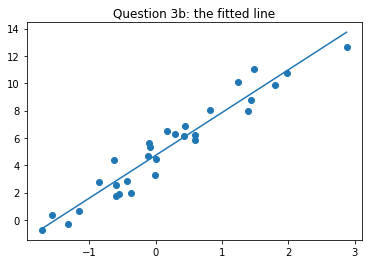

a = 3.129414619191207, b = 4.719354385844762
0.8557483910540564
0.9608049758277348


In [ ]:
print('\nQuestion 3(d):')
a,b = plot_data(dataTrain[0], dataTrain[1])

print("a = {0}, b = {1}".format(a,b))

print(error(a,b, dataTrain[0], dataTrain[1]))
print(error(a,b, dataTest[0], dataTest[1]))

4

In [ ]:
print('\n\nQuestion 4')
print('----------')



Question 4
----------


In [ ]:
file_path = '/content/gdrive/My Drive/Notes/CSC311/A1/dataA1Q4v2.pickle'
with open(file_path, 'rb') as f:
  Xtrain, Ttrain, Xtest, Ttest = pickle.load(f)

In [ ]:
from google.colab import files
files.upload()

(<matplotlib.axes._subplots.Axes3DSubplot at 0x7fce60cabf60>,
 <Figure size 432x288 with 1 Axes>)

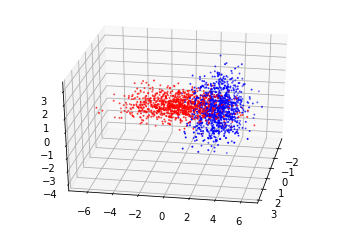

In [ ]:
import bonnerlib3 as bl3d
bl3d.plot_data(Xtrain, Ttrain, 30, 10)

a)

In [ ]:
print('\nQuestion 4(a):')
clf = lin.LogisticRegression()    # create a classification object, clf
clf.fit(Xtrain,Ttrain)            # learn a logistic-regression classifier
W = clf.coef_[0]                  # weight vector
W0 = clf.intercept_[0]            # bias term

print(W)
print(W0)


Question 4(a):
[0.01694442 1.49601981 0.03738886]
-2.6250489555396475


b)

In [ ]:
print('\nQuestion 4(b):')
accuracy1 = clf.score(Xtest, Ttest)

Z = np.matmul(W, np.transpose(Xtest)) + W0
Y = 1/(1+np.exp(-Z))
Y = np.where(Y>0.5, 1,0)

accuracy2 = np.mean(np.where(Y==Ttest, 1, 0))

print("accuracy1 = {0} \naccuracy2 = {1}".format(accuracy1, accuracy2))
print("accuracy1 - accuracy2 = {0}".format(accuracy1-accuracy2))


Question 4(b):
accuracy1 = 0.856 
accuracy2 = 0.856
accuracy1 - accuracy2 = 0.0


c)

Text(0.5, 0.98, 'Question 4(c): Training data and decision boundary')

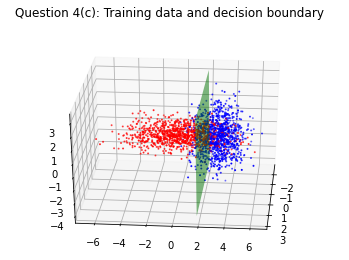

In [ ]:
#c)
bl3d.plot_db(Xtrain, Ttrain, W, W0, elevation=30, azimuth=5)
plt.suptitle("Question 4(c): Training data and decision boundary")

d)

Text(0.5, 0.98, 'Question 4(d): Training data and decision boundary')

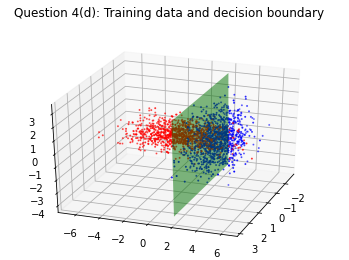

In [ ]:
#d)
bl3d.plot_db(Xtrain, Ttrain, W, W0, elevation=30, azimuth=20)
plt.suptitle("Question 4(d): Training data and decision boundary")

5

In [ ]:
print('\n\nQuestion 5')
print('----------')



Question 5
----------


Weight vector:
[ 0.01742884  1.50286689  0.03801734 -2.63865051]
Iterations: 2822
The weight learned in question 4 was:
[0.01694442 1.49601981 0.03738886]
The bias learned in question 4 was: -2.6250489555396475


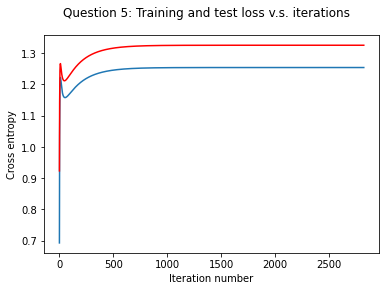

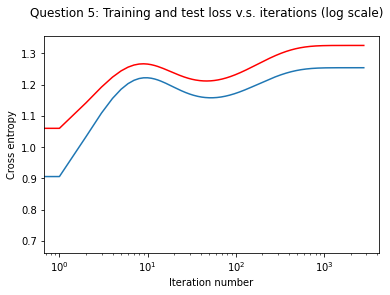

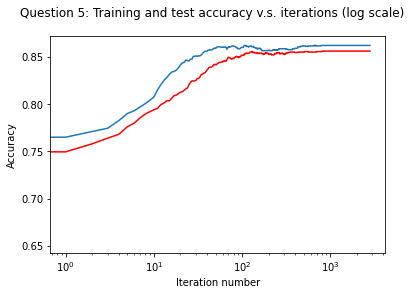

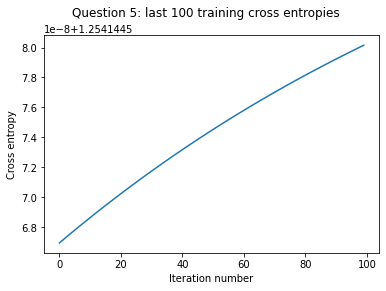

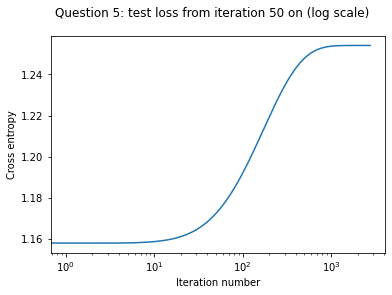

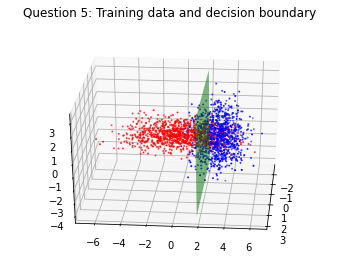

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def cross_entropy(y,t):
  return (-t * np.log(1-y)) - (1-t)*np.log(1-y)

def gd_logreg(lrate):
  global Xtrain
  global Xtest
  global Ttrain
  global Ttest
  global W
  global W0
  N = Xtrain.shape[0]
  m = Xtrain.shape[1]

  o = np.ones((N,1))
  Xtrain = np.concatenate((Xtrain,o), axis=1)

  o = np.ones((Xtest.shape[0], 1))
  Xtest = np.concatenate((Xtest, o), axis=1)

  #a)
  np.random.seed(3)

  #b)
  w = np.random.randn(m+1) / 1000

  #c)
  ce_train  = []
  acc_train = []
  ce_test   = []
  acc_test  = []

  #d)
  iter = 0
  while (iter < 2 or np.absolute(ce_train[-2] - ce_train[-1]) > 10**-10):
    z = np.matmul(w, np.transpose(Xtrain))
    y = sigmoid(z)
    w = w - (lrate/N) * np.matmul(np.transpose(Xtrain), y-Ttrain)

    #training_loss + accuracy
    loss = np.mean(cross_entropy(y, Ttrain))
    ce_train.append(loss)
    pred = np.where(y>0.5,1,0)
    accuracy = np.mean(np.where(pred==Ttrain,1,0))
    acc_train.append(accuracy)

    #test loss + accuracy
    test_z = np.matmul(w, np.transpose(Xtest))
    test_y = sigmoid(test_z)
    test_loss = np.mean(cross_entropy(test_y, Ttest))
    ce_test.append(test_loss)
    test_pred = np.where(test_y>0.5,1,0)
    test_accuracy = np.mean(np.where(test_pred==Ttest,1,0))
    acc_test.append(test_accuracy)

    '''
    print("Iter: {0}".format(iter+1))
    print("Training cost: {0}; Training accuracy: {1}".format(loss,accuracy))
    print("Test cost:     {0}; Test accuracy    : {1}".format(np.mean(ce_test), test_accuracy))
    print()'''
    iter+=1

  #e)
  print("Weight vector:")
  print(w)
  print("Iterations: {0}".format(iter))
  print("The weight learned in question 4 was:\n{0}".format(W))
  print("The bias learned in question 4 was: {0}".format(W0))

  #f)
  plt.figure(0)
  plt.plot(ce_train)
  plt.plot(ce_test, 'r')
  plt.suptitle("Question 5: Training and test loss v.s. iterations")
  plt.xlabel("Iteration number")
  plt.ylabel("Cross entropy")

  #g)
  plt.figure(1)
  plt.semilogx(ce_train)
  plt.semilogx(ce_test, 'r')
  plt.suptitle("Question 5: Training and test loss v.s. iterations (log scale)")
  plt.xlabel("Iteration number")
  plt.ylabel("Cross entropy")

  #h)
  plt.figure(2)
  plt.semilogx(acc_train)
  plt.semilogx(acc_test, 'r')
  plt.suptitle("Question 5: Training and test accuracy v.s. iterations (log scale)")
  plt.xlabel("Iteration number")
  plt.ylabel("Accuracy")

  #i)
  plt.figure(3)
  plt.plot(ce_train[-100:])
  plt.suptitle("Question 5: last 100 training cross entropies")
  plt.xlabel("Iteration number")
  plt.ylabel("Cross entropy")

  #j)
  plt.figure(4)
  plt.semilogx(ce_train[50:])
  plt.suptitle("Question 5: test loss from iteration 50 on (log scale)")
  plt.xlabel("Iteration number")
  plt.ylabel("Cross entropy")

  #k)
  bl3d.plot_db(Xtrain, Ttrain, w[:-1], w[-1],  30, 5)
  plt.suptitle("Question 5: Training data and decision boundary")

gd_logreg(0.3)

6

In [ ]:
print('\n\nQuestion 6')
print('----------')



Question 6
----------


In [ ]:
file_path = '/content/gdrive/My Drive/Notes/CSC311/A1/mnistTVT.pickle'
with open(file_path, 'rb') as f:
  Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = pickle.load(f)

a)

In [ ]:
#a)
def extract(X, T, num1, num2):
  t1 = T == num1
  t2 = T == num2
  t  = np.not_equal(t1, t2)

  return X[t], T[t]

xtrain, ttrain = extract(Xtrain, Ttrain, 5, 6)
xtrain_small = xtrain[:2000]
ttrain_small = ttrain[:2000]
xval, tval = extract(Xval, Tval, 5, 6)
xtest, ttest = extract(Xtest, Ttest, 5, 6)

b)


Question 6(b):


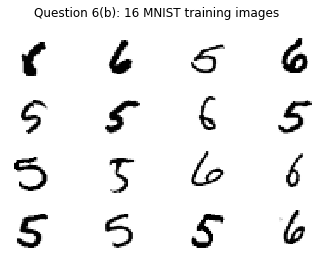

In [ ]:
print('\nQuestion 6(b):')
def display(x):
  display = x[:16,:]
  display = np.reshape(display, (4, 4, 28, 28))
  f, axarr = plt.subplots(4,4)
  for i in range(4):
    axarr[i,0].imshow(display[i,0], cmap='Greys', interpolation='nearest')
    axarr[i,0].axis('off')
    axarr[i,1].imshow(display[i,1], cmap='Greys', interpolation='nearest')
    axarr[i,1].axis('off')
    axarr[i,2].imshow(display[i,2], cmap='Greys', interpolation='nearest')
    axarr[i,2].axis('off')
    axarr[i,3].imshow(display[i,3], cmap='Greys', interpolation='nearest')
    axarr[i,3].axis('off')
  plt.suptitle("Question 6(b): 16 MNIST training images")    

display(xtrain)

c)

In [ ]:
print('\nQuestion 6(c):')


Question 6(c):


i)

In [ ]:
#i)
def test_Ks(xtrain, ttrain, xval, tval, xtrain_small, ttrain_small):
  Train_acc = []
  Val_acc   = []
  iters     = []
  for i in range(1,20,2):
    model = ne.KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain, ttrain)
    
    Val_acc.append(model.score(xval, tval))
    Train_acc.append(model.score(xtrain_small, ttrain_small))
    iters.append(i)

  return Train_acc, Val_acc, iters

Train_acc, Val_acc, iters = test_Ks(xtrain, ttrain, xval, tval, xtrain_small, ttrain_small)

ii)

Text(0, 0.5, 'Accuracy')

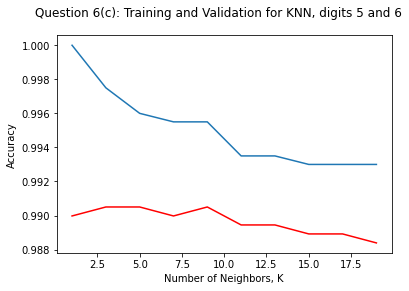

In [ ]:
#ii)
plt.plot(iters, Train_acc)
plt.plot(iters, Val_acc, 'r')
plt.suptitle("Question 6(c): Training and Validation for KNN, digits 5 and 6")
plt.xlabel("Number of Neighbors, K")
plt.ylabel("Accuracy")

iii)

In [ ]:
max(Val_acc)

0.9905013192612138

iv)

In [ ]:
model = ne.KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain, ttrain)
Test_acc = model.score(xtest, ttest)

v)

In [ ]:
print("The best value of K is {0}".format(3))

The best value of K is 3


vi)

In [ ]:
print("Validation accuracy: {0}".format(Val_acc[1]))
print("Test accuracy      : {0}".format(Test_acc))

Validation accuracy: 0.9905013192612138
Test accuracy      : 0.9929729729729729


d)

In [ ]:
print('\nQuestion 6(d):')


Question 6(d):


Text(0.5, 0.98, 'Question 6(d): MNIST training images')

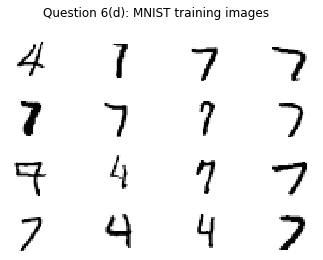

In [ ]:
#a)
xtrain, ttrain = extract(Xtrain, Ttrain, 4, 7)
xval,   tval   = extract(Xval, Tval, 4, 7)
xtest, ttest   = extract(Xtest, Ttest, 4, 7)

xtrain_small = xtrain[:2000]
ttrain_small = ttrain[:2000]

#b)
display(xtrain)
plt.suptitle("Question 6(d): MNIST training images")

0.9975996159385502
The best value of K is 9
Validation accuracy: 0.9971195391262602
Test accuracy      : 0.9945273631840796


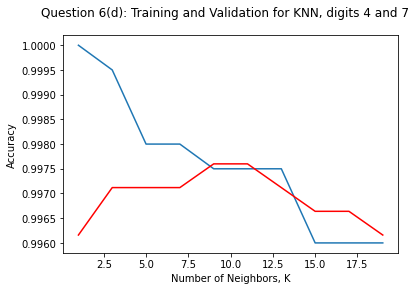

In [ ]:
#c)
Train_acc, Val_acc, iters = test_Ks(xtrain, ttrain, xval, tval, xtrain_small, ttrain_small)

plt.plot(iters, Train_acc)
plt.plot(iters, Val_acc, 'r')
plt.suptitle("Question 6(d): Training and Validation for KNN, digits 4 and 7")
plt.xlabel("Number of Neighbors, K")
plt.ylabel("Accuracy")

print(max(Val_acc))

model = ne.KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain, ttrain)
Test_acc = model.score(xtest, ttest)

print("The best value of K is {0}".format(2 * Val_acc.index(max(Val_acc)) + 1))

print("Validation accuracy: {0}".format(Val_acc[1]))
print("Test accuracy      : {0}".format(Test_acc))

e)

In [ ]:
#e) 
'''
I suspect that the biggest reason behind both of these occurences is the fact 
that there are more differences between 4 and 7 then between 5 and 6. A 5 is 
more likely to look similar to a 6 and vice versa than a 4 is to a 7. 
'''

f)

In [ ]:
#f)
'''
because we only have two classes, an odd number of k prevents a tie in the 
decision. In each prediction, one class will hold the majority of predictions
'''

'\nbecause we only have two classes, an odd number of k prevents a tie in the \ndecision. In each prediction, one class will hold the majority of predictions\n'

g)

In [ ]:
#g)
'''
Because numbers were designed to look different from one another and 
are unlikely to have many outliers in comparison to some other data sets. This 
lack of outliers makes it a great candidate for KNN because any given handdrawn
digit is highly likely to look like another hand drawn version of the same
digit
'''

'\nBecause numbers were designed to look different from one another and \nare unlikely to have many outliers in comparison to some other data sets. This \nlack of outliers makes it a great candidate for KNN because any given handdrawn\ndigit is highly likely to look like another hand drawn version of the same\ndigit\n'